Imports

In [1]:
import pandas as pd
import numpy as np



Def for saving it to a GIF

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os

def SaveToGIF(df,num_elements_to_plot=2000,x=[],gif_file_name='output.gif',xlabel="x",ylabel="y"):
    images = []

    for index, row in df.iterrows():
        
        data = row.iloc[:num_elements_to_plot]
        
        if len(x) == 0:
            plt.plot(data)
        else:
            plt.plot(x,data)

        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title({index})
        plt.savefig(f'plot_{index}.png')
        plt.close()

        img = Image.open(f'plot_{index}.png')
        images.append(img)

    
    frame_duration = 1000

    images[0].save(
        gif_file_name,
        save_all=True,
        append_images=images[1:],
        duration=frame_duration,
        loop=0
    )

    # Clean up: remove the temporary plot images
    for index, _ in enumerate(df):
        file_name = f'plot_{index}.png'
        if os.path.exists(file_name):
            os.remove(file_name)


Read File and Create Pandas DataFrame

In [3]:
#csv_file = 'test1.csv'
csv_file = 'test1.csv'

df = pd.read_csv(csv_file)




In [4]:
header = list(df)
if header[0] == "USUT":
    print("File form is okay.")
else:
    raise Exception("Wrong File. Check the data in the csv file.")


puffer_size = int(header[2])

# first float() convert is needed if the original type cannot be int
sampling_frequency = int(float(header[4]))

#8 or 12 bits
bits = int(float(header[5]))

if bits == 8:
    print("Scaling .csv  for 8 bits.")
    scale_num = 255.0
elif bits == 12:
    print("Scaling .csv  for 12 bits.")
    scale_num = 4095.0

#devide with 255.0 if 8 bit and devide with 4095.0 if 12 bit

#Opening the noheader file for correct transformation:
csv_file2 = 'test1_NoHeader.csv'

df = pd.read_csv(csv_file2)

df_scaled = df / scale_num

output_csv_file = 'test1_scaled.csv'

df_scaled.to_csv(output_csv_file, index=False)


File form is okay.
Scaling .csv  for 12 bits.


Creating plots and finding peaks


In [5]:
# This line would run for 5-6 minutes and saves your rows into a GIF, depending on the df you provide it.
# It has another parameter, which lets you cutoff the row length. 

#SaveToGIF(df_scaled)

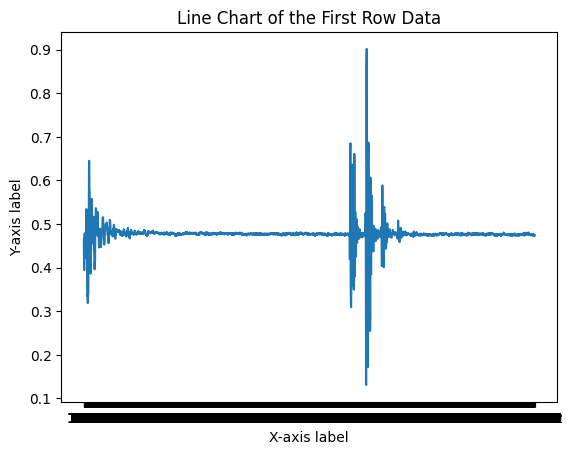

In [27]:
#It is just to plot one line till 2000 element to see if it has coharent data.
first_row = df_scaled.iloc[22]
plt.plot(first_row[:2000])
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Line Chart of the First Row Data')
plt.show()

Parameters:

In [7]:
print(puffer_size)
print(sampling_frequency)

15000
20000000


In [30]:

#Post delay, which is a hard-coded num, dependent by the settings of the original:
post_delay = 50


#time, which linearly spaces [puffer_size] elements, between a and b
a = post_delay/sampling_frequency
b = post_delay/sampling_frequency + puffer_size/sampling_frequency
time = np.linspace(a, b, puffer_size) 


# mm_vector, which calculates the distance travelled in mm: 
# time * speed / 2 * 1000 (conv to mmm)
mm_vector = time*1500/2*1000

#Should be length of  puffer_size
len(time)




15000

In [ ]:
SaveToGIF(df_scaled,len(df_scaled.iloc[1]),mm_vector,'Distance.gif','mm')

This part is for fourier transform:

In [11]:
import scipy as scp

#Rowwise calculation of fft

fft_results = []


# Iterate through each row in the DataFrame
for index, row in df_scaled.iterrows():
    data = df_scaled.iloc[index]
#    data = data[50:]
    result = data- np.mean(data)

    [b, a] = scp.signal.butter(4,[1*10**6, 3*10**6],btype = 'bandpass', fs= sampling_frequency)    

    fft_result = np.fft.fft(result)
    fft_results.append(fft_result)
    


In [12]:

#FFT freq domain is calculated here:
#q: is the psot_delay at a right palce here? -50

#its in MHz (as /10**6)
fft_freq = np.linspace(0,1,puffer_size)*sampling_frequency/10**6


#SaveToGIF(fft_result)

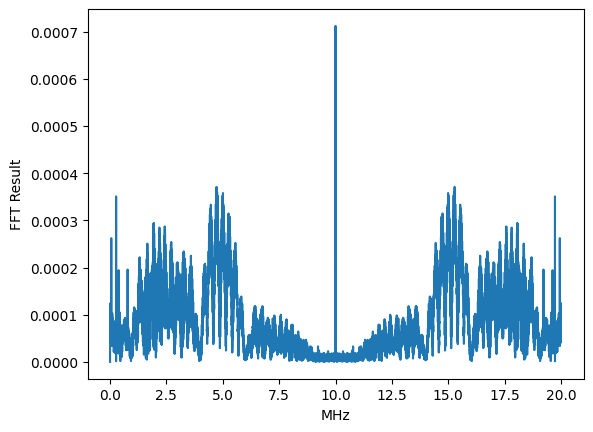

In [25]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()

Norm_Mag = np.abs(fft_results[3]) / puffer_size 

ax.plot(fft_freq,Norm_Mag)

ax.set_xlabel('MHz')
ax.set_ylabel('FFT Result')
plt.show()


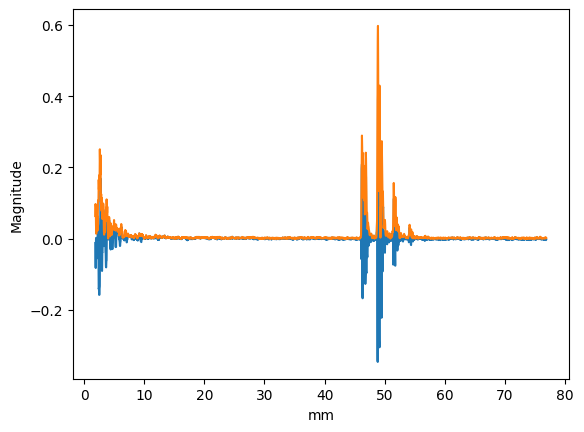

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert

list_row = df_scaled.iloc[-1].tolist()
analytic_signal = hilbert(list_row)

fig, ax = plt.subplots()
for index, row in df_scaled.iterrows():
    if index == 22:
        data = df_scaled.iloc[index]

        result = data- np.mean(data)

        env = np.abs(hilbert(result))
        ax.plot(mm_vector[:2000],result[:2000])
        ax.plot(mm_vector[:2000],env[:2000])

        ax.set_xlabel('mm')
        ax.set_ylabel('Magnitude')
        plt.show()



